# Study of Reinforcement Learning based on the [course](https://www.udemy.com/course/practical-ai-with-python-and-reinforcement-learning)

## Libraries

- [Gym](https://github.com/openai/gym)

## Deep Q-Learning (DQN) with Keras-RL2 implementation

In [ ]:
!pip install tensorflow==2.1.0 gym[classic_control]==0.17.3 matplotlib numpy keras-rl2

In [1]:
!python --version

Python 3.7.16


In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[]

In [3]:
tf.__version__

'2.1.0'

In [4]:
import time
import numpy as np
import random
import gym
import matplotlib
import matplotlib.pyplot as plt

from gym import logger as gymlogger
from IPython.display import clear_output

gymlogger.set_level(40) # error only
%matplotlib inline

In [10]:
from IPython.display import clear_output

def show_environment(array):
    plt.axis("off")
    plt.imshow(environment)
    plt.show()

In [11]:
env_name = "CartPole-v0"
env = gym.make(env_name)

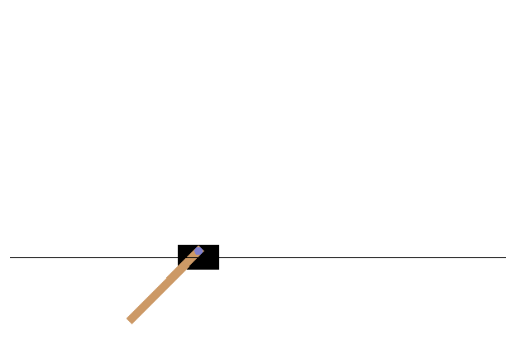

In [12]:
env.reset()
for step in range(50):
  environment = env.render(mode="rgb_array")
  show_environment(environment)
  action = env.action_space.sample()
  env.step(action)
  clear_output(wait=True)
env.close()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents.dqn import DQNAgent

In [14]:
num_states = env.observation_space.shape
num_actions = env.action_space.n

num_states, num_actions

((4,), 2)

In [15]:
(1,) + num_states

(1, 4)

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + num_states))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(num_actions))
model.add(Activation("linear"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________

In [17]:
from rl.memory import SequentialMemory

memory = SequentialMemory(limit=20_000, window_length=1)

In [18]:
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr="eps",
                              value_max=1.0,
                              value_min=0.1,
                              value_test=0.05,
                              nb_steps=20_000)

In [19]:
dqn = DQNAgent(model=model, nb_actions=num_actions,
               memory=memory, nb_steps_warmup=10,
               target_model_update=100, policy=policy)
dqn.compile(Adam(learning_rate=1e-3), metrics=["mae"])

In [20]:
dqn.fit(env, nb_steps=20_000, visualize=False, verbose=2)

Training for 20000 steps ...


D:\Programas\miniconda3\envs\myenv\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    17/20000: episode: 1, duration: 1.367s, episode steps:  17, steps per second:  12, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 0.755139, mae: 0.680204, mean_q: 0.110727, mean_eps: 0.999392
    40/20000: episode: 2, duration: 0.096s, episode steps:  23, steps per second: 240, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.478 [0.000, 1.000],  loss: 0.515269, mae: 0.565441, mean_q: 0.164575, mean_eps: 0.998740
    52/20000: episode: 3, duration: 0.050s, episode steps:  12, steps per second: 240, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 0.346479, mae: 0.535987, mean_q: 0.297736, mean_eps: 0.997952


D:\Programas\miniconda3\envs\myenv\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    76/20000: episode: 4, duration: 0.104s, episode steps:  24, steps per second: 230, episode reward: 24.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.458 [0.000, 1.000],  loss: 0.195563, mae: 0.518587, mean_q: 0.474091, mean_eps: 0.997142
   102/20000: episode: 5, duration: 0.106s, episode steps:  26, steps per second: 245, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.538 [0.000, 1.000],  loss: 0.096370, mae: 0.540950, mean_q: 0.728052, mean_eps: 0.996018
   137/20000: episode: 6, duration: 0.141s, episode steps:  35, steps per second: 247, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 0.236672, mae: 0.958295, mean_q: 1.352800, mean_eps: 0.994645
   152/20000: episode: 7, duration: 0.061s, episode steps:  15, steps per second: 245, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.077866, mae: 1.055834, mean_q: 1.983098, mean_ep

   901/20000: episode: 39, duration: 0.053s, episode steps:  11, steps per second: 206, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.273 [0.000, 1.000],  loss: 1.004929, mae: 4.497925, mean_q: 8.615101, mean_eps: 0.959725
   917/20000: episode: 40, duration: 0.074s, episode steps:  16, steps per second: 216, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.312 [0.000, 1.000],  loss: 0.800137, mae: 4.914974, mean_q: 9.435211, mean_eps: 0.959118
   937/20000: episode: 41, duration: 0.087s, episode steps:  20, steps per second: 229, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.450 [0.000, 1.000],  loss: 0.725345, mae: 4.865154, mean_q: 9.432931, mean_eps: 0.958307
   956/20000: episode: 42, duration: 0.083s, episode steps:  19, steps per second: 230, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.579 [0.000, 1.000],  loss: 0.640625, mae: 4.847328, mean_q: 9.597269, mea

  1683/20000: episode: 72, duration: 0.172s, episode steps:  42, steps per second: 244, episode reward: 42.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.476 [0.000, 1.000],  loss: 1.381814, mae: 7.792979, mean_q: 15.535343, mean_eps: 0.925232
  1704/20000: episode: 73, duration: 0.095s, episode steps:  21, steps per second: 220, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.476 [0.000, 1.000],  loss: 1.600930, mae: 7.763653, mean_q: 15.442273, mean_eps: 0.923815
  1714/20000: episode: 74, duration: 0.048s, episode steps:  10, steps per second: 210, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 1.793180, mae: 8.256749, mean_q: 16.455031, mean_eps: 0.923118
  1728/20000: episode: 75, duration: 0.064s, episode steps:  14, steps per second: 220, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 1.546671, mae: 8.264487, mean_q: 16.462335,

  2576/20000: episode: 106, duration: 0.093s, episode steps:  20, steps per second: 214, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.350 [0.000, 1.000],  loss: 1.751593, mae: 12.157021, mean_q: 24.764588, mean_eps: 0.884553
  2601/20000: episode: 107, duration: 0.101s, episode steps:  25, steps per second: 248, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 2.142488, mae: 12.212011, mean_q: 24.729618, mean_eps: 0.883540
  2609/20000: episode: 108, duration: 0.034s, episode steps:   8, steps per second: 233, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 1.329339, mae: 12.618757, mean_q: 25.432443, mean_eps: 0.882797
  2710/20000: episode: 109, duration: 0.392s, episode steps: 101, steps per second: 257, episode reward: 101.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.525 [0.000, 1.000],  loss: 2.048671, mae: 12.685647, mean_q: 2

  3347/20000: episode: 138, duration: 0.074s, episode steps:  17, steps per second: 231, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.706 [0.000, 1.000],  loss: 3.091754, mae: 16.213171, mean_q: 33.101388, mean_eps: 0.849790
  3369/20000: episode: 139, duration: 0.090s, episode steps:  22, steps per second: 244, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 2.496364, mae: 16.017555, mean_q: 32.688542, mean_eps: 0.848913
  3391/20000: episode: 140, duration: 0.089s, episode steps:  22, steps per second: 247, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 1.975124, mae: 16.278721, mean_q: 33.149899, mean_eps: 0.847922
  3431/20000: episode: 141, duration: 0.168s, episode steps:  40, steps per second: 238, episode reward: 40.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 2.726358, mae: 16.656161, mean_q: 34

  4569/20000: episode: 171, duration: 0.209s, episode steps:  47, steps per second: 224, episode reward: 47.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.468 [0.000, 1.000],  loss: 5.194921, mae: 21.954928, mean_q: 44.935714, mean_eps: 0.795475
  4613/20000: episode: 172, duration: 0.243s, episode steps:  44, steps per second: 181, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 2.828725, mae: 21.836103, mean_q: 44.885540, mean_eps: 0.793427
  4623/20000: episode: 173, duration: 0.054s, episode steps:  10, steps per second: 185, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 3.603038, mae: 23.293102, mean_q: 47.496779, mean_eps: 0.792212
  4753/20000: episode: 174, duration: 0.595s, episode steps: 130, steps per second: 218, episode reward: 130.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.515 [0.000, 1.000],  loss: 3.422066, mae: 22.955472, mean_q: 4

  5802/20000: episode: 203, duration: 0.168s, episode steps:  39, steps per second: 232, episode reward: 39.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.590 [0.000, 1.000],  loss: 7.463361, mae: 29.229952, mean_q: 59.740000, mean_eps: 0.739810
  5885/20000: episode: 204, duration: 0.335s, episode steps:  83, steps per second: 248, episode reward: 83.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.506 [0.000, 1.000],  loss: 6.795105, mae: 29.842550, mean_q: 61.047137, mean_eps: 0.737065
  5903/20000: episode: 205, duration: 0.076s, episode steps:  18, steps per second: 238, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.556 [0.000, 1.000],  loss: 4.114629, mae: 30.551089, mean_q: 62.218828, mean_eps: 0.734793
  5930/20000: episode: 206, duration: 0.108s, episode steps:  27, steps per second: 249, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.444 [0.000, 1.000],  loss: 6.771493, mae: 29.612103, mean_q: 60

  7133/20000: episode: 235, duration: 0.457s, episode steps: 110, steps per second: 241, episode reward: 110.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.527 [0.000, 1.000],  loss: 10.455564, mae: 37.473808, mean_q: 76.677526, mean_eps: 0.681512
  7165/20000: episode: 236, duration: 0.134s, episode steps:  32, steps per second: 240, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 13.412396, mae: 38.279504, mean_q: 78.181486, mean_eps: 0.678317
  7185/20000: episode: 237, duration: 0.114s, episode steps:  20, steps per second: 176, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 9.558411, mae: 37.735992, mean_q: 77.040277, mean_eps: 0.677147
  7276/20000: episode: 238, duration: 0.500s, episode steps:  91, steps per second: 182, episode reward: 91.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.516 [0.000, 1.000],  loss: 8.183508, mae: 38.419084, mean_q:

  9369/20000: episode: 269, duration: 0.337s, episode steps:  71, steps per second: 211, episode reward: 71.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.535 [0.000, 1.000],  loss: 13.479184, mae: 50.397431, mean_q: 103.183453, mean_eps: 0.580015
  9518/20000: episode: 270, duration: 0.588s, episode steps: 149, steps per second: 253, episode reward: 149.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.523 [0.000, 1.000],  loss: 15.691347, mae: 50.748454, mean_q: 103.891487, mean_eps: 0.575065
  9621/20000: episode: 271, duration: 0.406s, episode steps: 103, steps per second: 253, episode reward: 103.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 16.076225, mae: 51.538107, mean_q: 105.547430, mean_eps: 0.569395
  9724/20000: episode: 272, duration: 0.404s, episode steps: 103, steps per second: 255, episode reward: 103.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.534 [0.000, 1.000],  loss: 18.460935, mae: 52.119537, 

 13236/20000: episode: 301, duration: 0.533s, episode steps: 111, steps per second: 208, episode reward: 111.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 17.618343, mae: 65.023665, mean_q: 132.928411, mean_eps: 0.406900
 13410/20000: episode: 302, duration: 0.840s, episode steps: 174, steps per second: 207, episode reward: 174.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.483 [0.000, 1.000],  loss: 24.311685, mae: 65.816336, mean_q: 134.483446, mean_eps: 0.400487
 13562/20000: episode: 303, duration: 0.931s, episode steps: 152, steps per second: 163, episode reward: 152.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.546 [0.000, 1.000],  loss: 23.398254, mae: 65.993668, mean_q: 134.398715, mean_eps: 0.393152
 13755/20000: episode: 304, duration: 1.071s, episode steps: 193, steps per second: 180, episode reward: 193.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.534 [0.000, 1.000],  loss: 20.965515, mae: 65.659036,

 18692/20000: episode: 333, duration: 0.765s, episode steps: 192, steps per second: 251, episode reward: 192.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.531 [0.000, 1.000],  loss: 25.096328, mae: 67.915393, mean_q: 138.002484, mean_eps: 0.163202
 18890/20000: episode: 334, duration: 0.811s, episode steps: 198, steps per second: 244, episode reward: 198.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.525 [0.000, 1.000],  loss: 24.817604, mae: 66.984147, mean_q: 136.211657, mean_eps: 0.154427
 19090/20000: episode: 335, duration: 0.789s, episode steps: 200, steps per second: 253, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 23.955387, mae: 66.850521, mean_q: 135.666890, mean_eps: 0.145472
 19290/20000: episode: 336, duration: 0.785s, episode steps: 200, steps per second: 255, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.480 [0.000, 1.000],  loss: 14.778563, mae: 66.719074,

In [24]:
dqn.save_weights("my_weights_cartpole.h5f", overwrite=True)

In [ ]:
# If you want to load a trained model
# dqn.load_weights(""my_weights_cartpole.h5f")

In [22]:
dqn.test(env, nb_episodes=5, visualize=True)
env.close()

Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
